# Inversion of ERT transects

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

import warnings
warnings.filterwarnings('ignore')

#!pip install resipy
sys.path.append('../../../software/resipy/src/')
from resipy import Project

datadir = 'Guillaume_code/'

API path =  /media/jkl/data/work/software/resipy/src/resipy
ResIPy version =  3.5.4
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


## Middelkerke

In [2]:
# reading electrode position
df = pd.read_csv(datadir + 'ert/middelkerke/electrode_locations_Middelkerke.csv')
elec = np.zeros((120, 3))
elec[:, 0] = df['distance'].values
df.head()

,nb_electrode,distance,easting,northing
0,1,0.0,41665.091,204320.014
1,2,0.5,41665.283,204319.552
2,3,1.0,41665.475,204319.091
3,4,1.5,41665.667,204318.629
4,5,2.0,41665.858,204318.167


Working directory is: /media/jkl/data/work/software/resipy/src/resipy
clearing dirname
filterData: 0 / 1693 quadrupoles removed.
308/1693 reciprocal measurements found.
32 measurements error > 20 %
19 measurements outside [0,6183.725257533959] removed!
filterData: 45 / 1674 quadrupoles removed.
45 measurements with greater than 10.0% reciprocal error removed!
Error model is R_err = 0.012 R_avg^0.875 (R^2 = 0.942)
Creating triangular mesh...done (12834 elements)


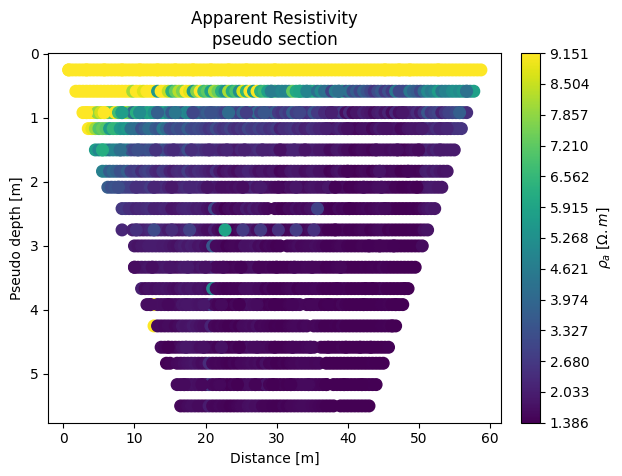

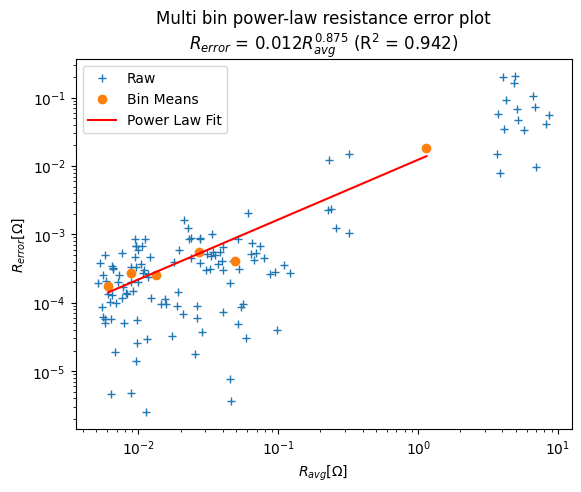

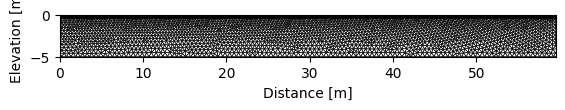

In [16]:
# invert
k = Project()
k.createSurvey(datadir + 'ert/middelkerke/23082301.csv', ftype='Syscal')
k.setElec(elec)
k.filterAppResist(vmin=0)
k.showPseudo()
k.filterRecip(percent=10)
k.fitErrorPwl()
k.createMesh('trian', cl=0.3)
k.showMesh()

In [17]:
# invert
k.err = True  # use fitted error in the inversion
k.invert()

Writing .in file and protocol.dat... done

--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 04 - 04 - 2024
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<
 >> D a t a   w e i g h t   t o   b e   r e a d   f r o m   d a t a   f i l e <<


 Processing dataset   1


 Measurements read:  1499     Measurements rejected:     0
   Geometric mean of apparent resistivities:  0.24176E+01

 

All ok


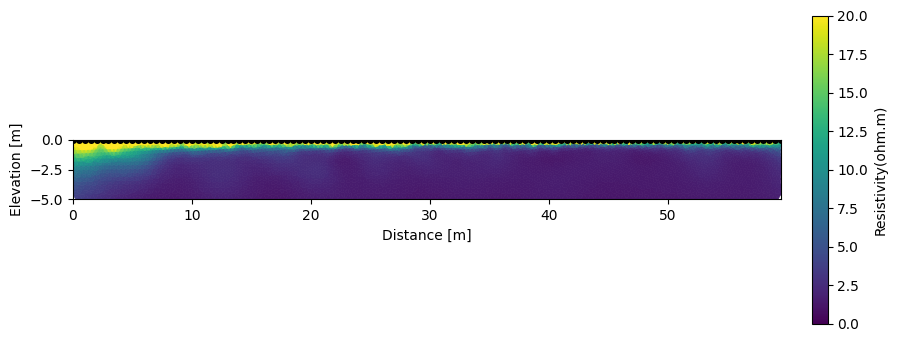

In [18]:
# inverted transect
fig, ax = plt.subplots(figsize=(10, 4))
k.showResults(ax=ax, sens=False, attr='Resistivity(ohm.m)', vmin=0, vmax=20)
fig.savefig(datadir + 'middelkerke-inverted.jpg', dpi=300)

In [19]:
# extract profiles
m = k.meshResults[0]
dfs = []
for i in range(df.shape[0]):
    row = df.loc[i, :]
    ie = m.df['X'].between(row['distance'] - 0.5, row['distance'] + 0.5) & m.df['Z'].gt(-5)
    sdf = m.df[ie][['Z', 'Resistivity(ohm.m)']]
    sdf['Z'] = sdf['Z'].round(1)
    #sdf['Z'] = (sdf['Z'] * 2).round(1) / 2
    sdf = sdf.groupby('Z').mean().reset_index()
    sdf['easting'] = row['easting']
    sdf['northing'] = row['northing']
    sdf['nb_electrode'] = row['nb_electrode']
    dfs.append(sdf)
dfm = pd.concat(dfs)
dfm.to_csv(datadir + 'middelkerke-profiles.csv', index=False)

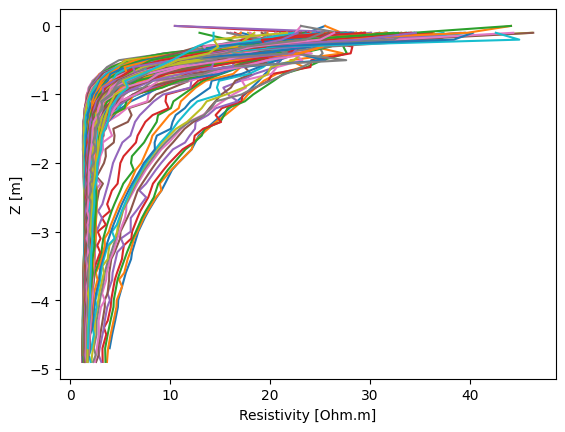

In [20]:
# figure of profiles
fig, ax = plt.subplots()
for el in dfm['nb_electrode'].unique():
    ie = dfm['nb_electrode'].eq(el)
    ax.plot(dfm[ie]['Resistivity(ohm.m)'], dfm[ie]['Z'], '-')
ax.set_xlabel('Resistivity [Ohm.m]')
ax.set_ylabel('Z [m]')
fig.savefig(datadir + 'middelkerke-prof.jpg')

## Proefhoeve

In [8]:
# reading electrode position
df = pd.read_csv(datadir + 'ert/proefhoeve/electrode_locations_Proefhoeve.csv')
df = df[:-1]
elec = np.zeros((60, 3))
elec[:, 0] = df['distance'].values
df.head()

,nb_electrode,distance,easting,northing
0,1,30.0,107761.108,183310.609
1,2,29.5,107761.387,183310.199
2,3,29.0,107761.668,183309.785
3,4,28.5,107761.949,183309.372
4,5,28.0,107762.230,183308.958


Working directory is: c:\Users\mendo\anaconda3_2\Lib\site-packages\resipy
clearing dirname
filterData: 0 / 993 quadrupoles removed.
182/993 reciprocal measurements found.
4 measurements error > 20 %
3 measurements outside [0,74.02322483964478] removed!
Error model is R_err = 0.007 R_avg^0.733 (R^2 = 0.082)
Creating triangular mesh...done (28060 elements)


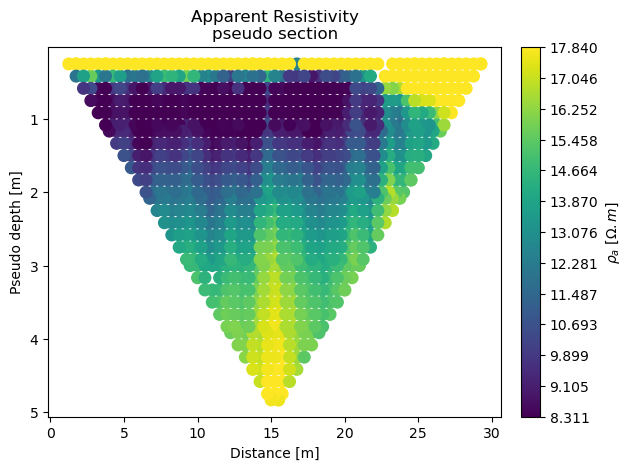

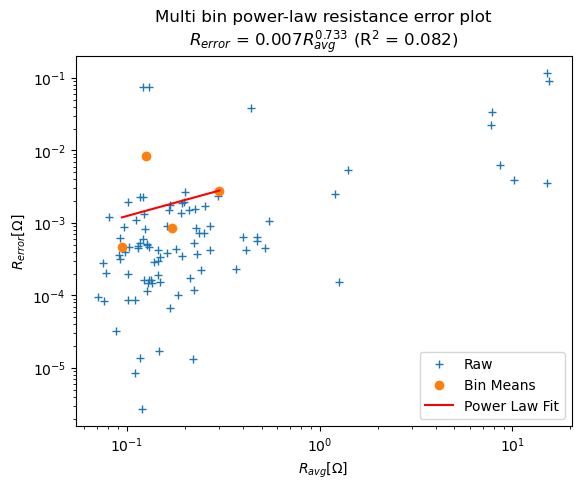

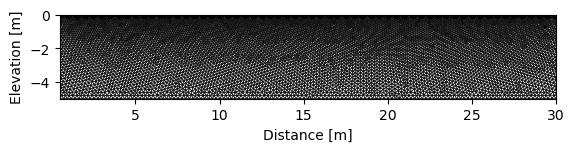

In [9]:
k = Project()
k.createSurvey(datadir + 'ert/proefhoeve/23082201.csv', ftype='Syscal')
k.setElec(elec)
k.filterAppResist(vmin=0)
k.showPseudo()
k.fitErrorPwl()
k.createMesh('trian', fmd=5)
k.showMesh()

In [10]:
# invert
k.err = True  # use fitted error in the inversion
k.invert()

Writing .in file and protocol.dat... done

--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 03 - 04 - 2024
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<
 >> D a t a   w e i g h t   t o   b e   r e a d   f r o m   d a t a   f i l e <<


 Processing dataset   1


 Measurements read:   899     Measurements rejected:     0
   Geometric mean of apparent resistivities:  0.12878E+02

 

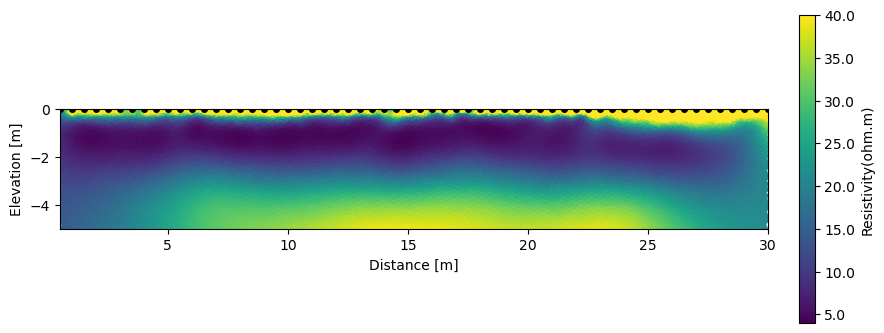

In [11]:
# inverted transect
fig, ax = plt.subplots(figsize=(10, 4))
k.showResults(ax=ax, attr='Resistivity(ohm.m)', sens=False, vmin=4, vmax=40)
fig.savefig(datadir + 'proefhoeve-inverted.jpg', dpi=300)

In [12]:
# extract profiles
m = k.meshResults[0]
dfs = []
for i in range(df.shape[0]):
    row = df.loc[i, :]
    ie = m.df['X'].between(row['distance'] - 0.5, row['distance'] + 0.5) & m.df['Z'].gt(-5)
    sdf = m.df[ie][['Z', 'Resistivity(ohm.m)']]
    sdf['Z'] = sdf['Z'].round(1)
    sdf = sdf.groupby('Z').mean().reset_index()
    sdf['easting'] = row['easting']
    sdf['northing'] = row['northing']
    sdf['nb_electrode'] = row['nb_electrode']
    dfs.append(sdf)
dfm = pd.concat(dfs)
dfm.to_csv(datadir + 'proefhoeve-profiles.csv', index=False)

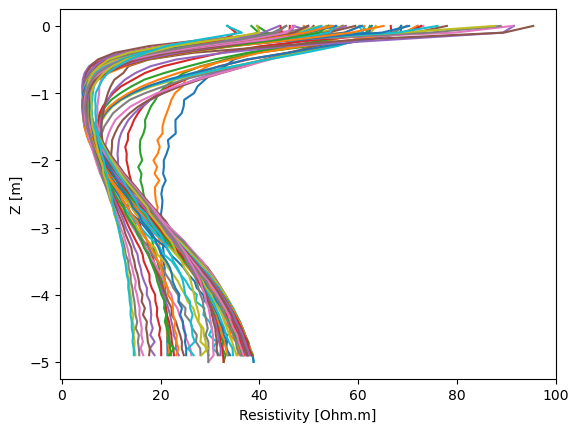

In [13]:
# figure of profiles
fig, ax = plt.subplots()
for el in dfm['nb_electrode'].unique():
    ie = dfm['nb_electrode'].eq(el)
    ax.plot(dfm[ie]['Resistivity(ohm.m)'], dfm[ie]['Z'], '-')
ax.set_xlabel('Resistivity [Ohm.m]')
ax.set_ylabel('Z [m]')
fig.savefig(datadir + 'proefhoeve-prof.jpg')